In [6]:
import os
import matplotlib.pyplot as pyplot
import matplotlib.pyplot as plt

from numpy import expand_dims
!rm -r logdir
!rm -r "untitled_project"

%load_ext tensorboard

rm: cannot remove 'untitled_project': No such file or directory
The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


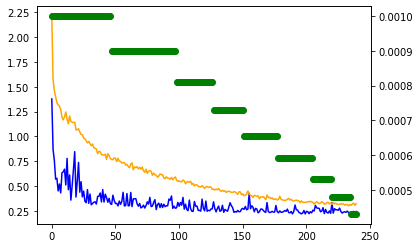

Results of the model training
13/13 [==============================] - 0s 6ms/step - loss: 0.2649 - mae: 0.2649 - mape: 5.7454 - R_Square: 0.8940
[0.2649087905883789, 0.2649087905883789, 5.745449542999268, 0.8940117359161377]


In [7]:
%run final_model_CNN1D.py

In [8]:
import tensorboard
%load_ext tensorboard
%tensorboard --logdir logdir

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


ERROR: Could not find `tensorboard`. Please ensure that your PATH
contains an executable `tensorboard` program, or explicitly specify
the path to a TensorBoard binary by setting the `TENSORBOARD_BINARY`
environment variable.

<AxesSubplot:xlabel='true', ylabel='preds'>

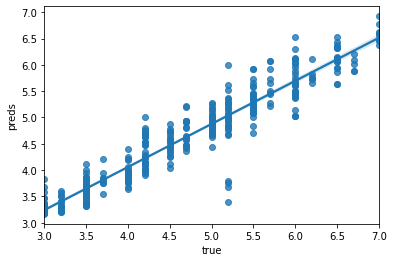

In [9]:
import pandas as pd
import numpy as np
preds = model.predict([Features_TestA, Features_TestG])
import seaborn as sns; 
#sns.set_theme(color_codes=True)
data = pd.DataFrame(np.hstack([Labels_TestA, preds]), columns = ['true', 'preds'])
sns.regplot(x = 'true', y = 'preds',data = data,)

In [12]:
!nvidia-smi

Thu Nov 12 23:12:17 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.33.01    Driver Version: 440.33.01    CUDA Version: 10.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce RTX 207...  On   | 00000000:0A:00.0  On |                  N/A |
| 18%   42C    P8    19W / 215W |   7829MiB /  7979MiB |      7%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [66]:
filters = list()
layers = list()
for layer in model.layers:
    if "conv" in layer.name:
        print(layer.name)
        filter, bias = layer.get_weights()
        filters.append(filter)
        layers.append(layer)
        print(filter.shape)
np.array(filters[0][0])

conv1D_A1
(5, 3, 45)
conv1D_G1
(5, 3, 45)
conv1D_A2
(5, 45, 45)
conv1D_G2
(5, 45, 45)


array([[ 0.14237025, -0.09490268,  0.17606744,  0.22890243,  0.02034822,
        -0.10350879,  0.12708169,  0.00065015,  0.0385547 ,  0.03636737,
        -0.09959441, -0.114797  ,  0.01979599, -0.09586558,  0.06787159,
         0.06801878,  0.09666542, -0.01573719, -0.06323404, -0.12095881,
         0.21350196,  0.03789365, -0.06024235, -0.17792174, -0.00823416,
         0.10404897,  0.08557015, -0.09749963, -0.04060499,  0.23116384,
        -0.19802031, -0.06390793,  0.24637002, -0.16937521, -0.01068245,
         0.05988493,  0.0272444 ,  0.06742448, -0.0241658 ,  0.05060008,
         0.04624526, -0.15465929, -0.09868121, -0.05069588,  0.00277573],
       [-0.04613897, -0.15077907,  0.07942221, -0.13790336,  0.05644701,
         0.19590116, -0.11446111, -0.05822592, -0.1016708 , -0.11443601,
        -0.14472343,  0.04394395,  0.18001194, -0.10786236,  0.07401799,
         0.200926  , -0.08433489, -0.0363097 , -0.15834513,  0.13650306,
        -0.04452221, -0.14998865,  0.07639916, -0.

In [67]:
arr = np.swapaxes(np.array(filters[0]), 0,2)[30].reshape(3,5,1)

In [68]:
bias

array([ 2.9709766e-04, -4.9356959e-04, -1.8256938e-04,  7.8831927e-04,
        3.0388255e-04, -4.1058529e-04, -3.8710696e-04,  4.8225684e-04,
        7.3705400e-05, -2.6763702e-04, -1.2547104e-03, -6.5087952e-04,
        1.5361969e-04, -5.6609442e-05,  6.5722939e-04,  6.7632349e-04,
       -2.0792360e-04,  3.5092697e-04,  2.8283783e-04,  4.3111696e-04,
        5.2812503e-04, -3.1636524e-04, -5.4005394e-04,  4.6558597e-04,
        1.4465034e-04,  7.4628282e-05,  7.5307151e-04,  1.1868868e-03,
        1.3405042e-04,  4.0982250e-04,  8.6563488e-04, -3.7710881e-04,
       -5.8833859e-05, -3.0787687e-05,  1.8535698e-04, -1.5954010e-04,
       -4.0528910e-05,  1.4224428e-03,  6.2662904e-04, -6.4898893e-05,
        6.0593698e-04,  2.3693501e-04, -6.7346315e-05, -2.6323993e-04,
       -2.3300714e-04], dtype=float32)

In [ ]:
plt.figure(figsize = (5,5))
plt.imshow(arr, interpolation='nearest', aspect='auto', cmap= 'Reds')
plt.colorbar()
plt.show()
%matplotlib inline

In [15]:
# normalize filter values to 0-1 so we can visualize them
#f_min, f_max = filters.min(), filters.max()



filters = [(f - f.min()) / (f.max() - f.min()) for f in filters]

In [49]:
# plot first few filters
n_filters, ix = 6, 1
for i in range(n_filters):
	# get the filter
	f = filters[:, :, :, i]
	# plot each channel separately
	for j in range(1):
		# specify subplot and turn of axis
		ax = pyplot.subplot(n_filters, 3, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		pyplot.imshow(f[:, :, j], cmap='gray')
		ix += 1
# show the figure
pyplot.show()

TypeError: list indices must be integers or slices, not tuple

In [50]:
n_filters, ix = 6, 1
for i in range(n_filters):
	# get the filter
	f = filters[:, :, :, i]
	# plot each channel separately
	for j in range(3):
		# specify subplot and turn of axis
		ax = pyplot.subplot(n_filters, 3, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		pyplot.imshow(f[:, :, j], cmap='gray')
		ix += 1
# show the figure
pyplot.show()

TypeError: list indices must be integers or slices, not tuple

In [51]:
Features_TestA.shape

(394, 150, 3)

In [52]:
Features_TestA[0].shape

(150, 3)

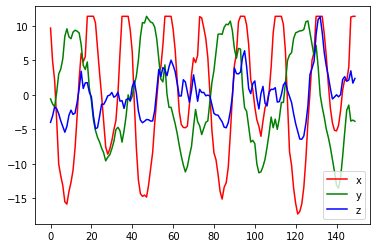

In [53]:


def plot_xyz(to_plot, plot=True,ax=None):
    if not plot:
        ax.plot(range(to_plot.shape[1]),to_plot[0], color="red", label="x")
        ax.plot(range(to_plot.shape[1]),to_plot[1], color="green", label="y")
        ax.plot(range(to_plot.shape[1]),to_plot[2], color="blue", label="z")
        ax.legend()
        plt.show()
        return ax
    else:
        plt.plot(range(to_plot.shape[1]),to_plot[0]-np.mean(to_plot[0]) , color="red", label="x")
        plt.plot(range(to_plot.shape[1]),to_plot[1]-np.mean(to_plot[1]), color="green", label="y")
        plt.plot(range(to_plot.shape[1]),to_plot[2]-np.mean(to_plot[2]), color="blue", label="z")
        plt.legend()
        plt.show()
        %matplotlib inline

to_plot= Features_TestA[10].T
plot_xyz(to_plot)

In [54]:
np.sqrt(np.square(to_plot[0]))

array([22.76086957, 17.95652174, 15.20652174,  9.44565217,  3.02173913,
        1.31521739,  0.07608696,  2.44565217,  2.77173913,  0.94565217,
        0.35869565,  2.10869565,  5.33695652,  9.94565217, 15.35869565,
       19.11956522, 17.86956522, 18.59782609, 24.4673913 , 24.4673913 ,
       24.4673913 , 24.47826087, 23.5       , 19.84782609, 16.23913043,
       12.93478261,  9.15217391,  5.52173913,  4.4673913 ,  5.2173913 ,
        6.42391304,  8.02173913,  9.33695652, 13.29347826, 19.10869565,
       24.4673913 , 24.4673913 , 24.4673913 , 24.4673913 , 22.51086957,
       19.30434783, 12.        ,  5.39130435,  0.73913043,  1.26086957,
        1.65217391,  1.4673913 ,  1.75      ,  0.        ,  2.34782609,
        4.76086957,  8.98913043, 12.51086957, 16.09782609, 17.11956522,
       20.29347826, 24.47826087, 24.4673913 , 24.4673913 , 24.4673913 ,
       22.63043478, 19.61956522, 15.14130435, 10.70652174,  8.77173913,
        8.34782609,  8.30434783,  8.54347826, 11.7173913 , 15.96

In [55]:
import numpy as np
gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))
gradient.shape

(2, 256)

In [56]:
print([layer.name for layer in model.layers])

['input_3', 'conv1D_A1', 'batch_normalization_4', 'input_4', 'leaky_re_lu_4', 'conv1D_G1', 'conv1D_A2', 'batch_normalization_6', 'batch_normalization_5', 'leaky_re_lu_6', 'activation_1', 'conv1D_G2', 'global_max_pooling1d_3', 'batch_normalization_7', 'add_2', 'add_3', 'leaky_re_lu_5', 'leaky_re_lu_7', 'global_max_pooling1d_4', 'global_max_pooling1d_5', 'concatenate_1', 'dense_3', 'dropout_2', 'dense_4', 'dropout_3', 'dense_5']


In [57]:
mod6 = model.layers[6]


In [58]:
mod6.weights


[<tf.Variable 'conv1D_A2_1/kernel:0' shape=(5, 45, 45) dtype=float32, numpy=
 array([[[ 0.07848144, -0.10724929,  0.06802081, ...,  0.10547753,
          -0.04519255,  0.07652764],
         [ 0.04652445, -0.0284647 ,  0.07088495, ..., -0.02966732,
          -0.19518502,  0.09959311],
         [ 0.04233845,  0.05622255,  0.03544021, ...,  0.07292011,
           0.12721676, -0.13292654],
         ...,
         [-0.09344179, -0.00587008,  0.21654601, ...,  0.042341  ,
          -0.03457149, -0.01405891],
         [ 0.07017237, -0.24274188,  0.02281663, ...,  0.13872744,
          -0.14566313,  0.12541357],
         [-0.05421517, -0.15817948, -0.14561611, ...,  0.06185931,
          -0.00346382,  0.0007141 ]],
 
        [[-0.01762573, -0.01320627, -0.00215756, ...,  0.01827661,
          -0.04705022,  0.05016581],
         [-0.10325938,  0.09692449,  0.11490998, ..., -0.02203047,
          -0.18460616,  0.0709212 ],
         [ 0.03151187,  0.09366624,  0.16346695, ..., -0.15014322,
       

In [59]:
model.summary()


Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 150, 3)]     0                                            
__________________________________________________________________________________________________
conv1D_A1 (Conv1D)              (None, 146, 45)      720         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_4 (BatchNor (None, 146, 45)      180         conv1D_A1[0][0]                  
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 150, 3)]     0                                            
____________________________________________________________________________________________

In [60]:
# redefine model to output right after the first hidden layer
from keras.models import Model
# model_min = model.inputs[0]
# model_min = layers[0](model_min)
# model_min = layers[2](model_min)
import numpy as np
model_min=np.nan
model_min = Model(inputs=model.inputs[0], outputs=model.layers[10].output)
model_min.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 150, 3)]          0         
_________________________________________________________________
conv1D_A1 (Conv1D)           (None, 146, 45)           720       
_________________________________________________________________
batch_normalization_4 (Batch (None, 146, 45)           180       
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 146, 45)           0         
_________________________________________________________________
conv1D_A2 (Conv1D)           (None, 146, 45)           10170     
_________________________________________________________________
batch_normalization_5 (Batch (None, 146, 45)           180       
_________________________________________________________________
activation_1 (Activation)    (None, 146, 45)           0   

In [61]:
datum_ex = Features_TestA[300]
datum = expand_dims(datum_ex, axis=0)
datum_ex = datum_ex.T

In [62]:
feature_maps = model_min.predict(datum)
feature_maps

array([[[0.93579286, 0.9917209 , 0.        , ..., 0.        ,
         1.1490948 , 0.6347965 ],
        [1.4312643 , 1.250814  , 0.        , ..., 0.        ,
         1.2734368 , 0.4360217 ],
        [2.4464061 , 1.7254541 , 0.        , ..., 0.        ,
         0.933155  , 0.31676883],
        ...,
        [0.        , 0.        , 0.13612415, ..., 0.        ,
         0.        , 0.79035354],
        [0.        , 0.        , 0.19351096, ..., 0.        ,
         0.2745061 , 0.5004327 ],
        [0.31368113, 0.        , 0.11513929, ..., 0.        ,
         1.0713282 , 0.16082324]]], dtype=float32)

In [63]:
feature_maps = feature_maps/feature_maps.max()


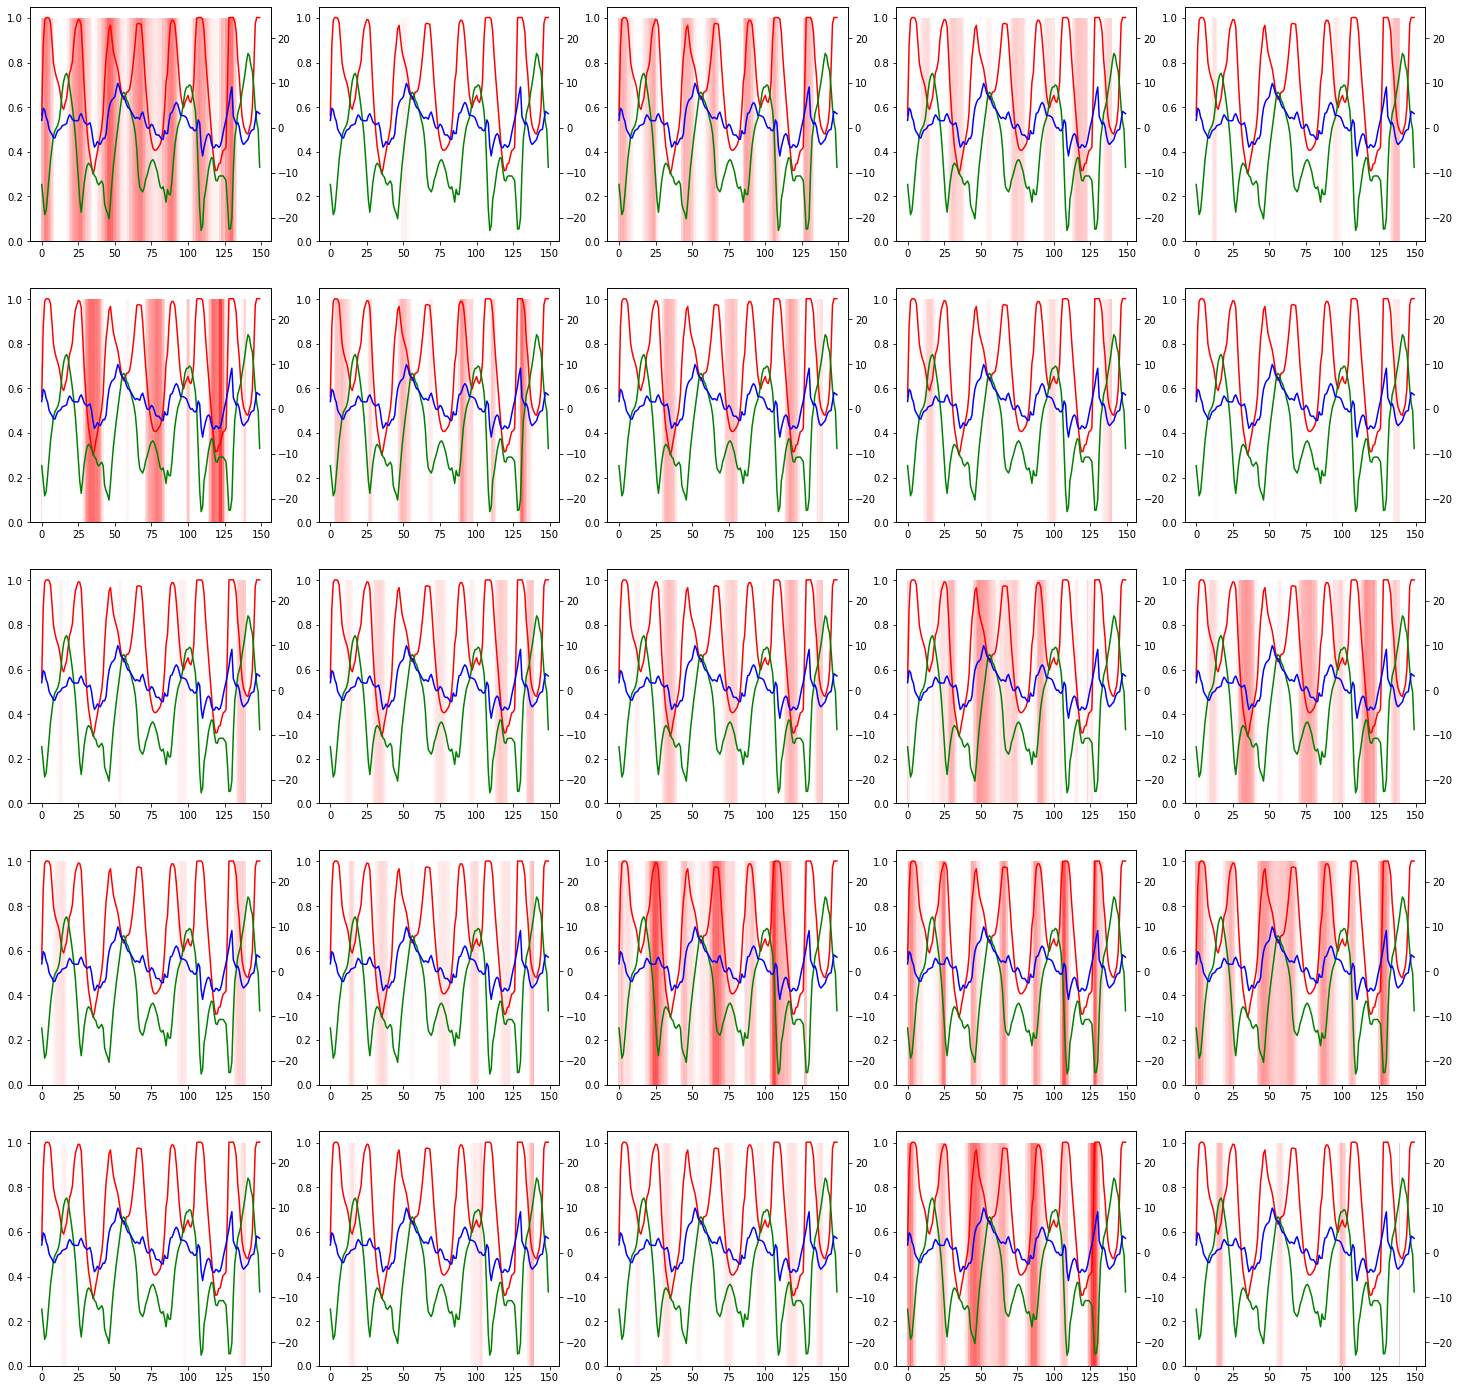

In [64]:
# plot all 64 maps in an 8x8 squares
square = 5
ix = 1

pyplot.figure(figsize=(25,25))
#pyplot.style.use('light_background')


for _ in range(square):
    for _ in range(square):
        # specify subplot and turn of axis

        ax = pyplot.subplot(square, square, ix)
       # ax.set_xticks([])
        ax.set_facecolor('white')
        #ax.set_yticks([])
        # plot filter channel in grayscale
        #ax = plot_xyz(to_plot,plot=False,ax=ax)
        #pyplot.twinx()
        #pyplot.imshow(feature_maps[0, :, :, ix], aspect='auto', cmap ='PuRd', )
        #pyplot.scatter(feature_maps[0, :, ix])
        for i in range(140):
            pyplot.bar(i,1, color ="red",alpha =feature_maps[0, :, ix][i], width=1)
        pyplot.twinx()
        pyplot.plot(range(datum_ex.shape[1]),datum_ex[0], color="red", label="x")
        pyplot.plot(range(datum_ex.shape[1]),datum_ex[1], color="green", label="y")
        pyplot.plot(range(datum_ex.shape[1]),datum_ex[2], color="blue", label="z")
        #pyplot.twinx()
        ix += 1
# show the figure
pyplot.show()

In [65]:
pyplot.imshow(feature_maps[0, :, :, ix-1], cmap='gray',aspect="auto")

IndexError: too many indices for array

In [ ]:
plot_xyz(feature_maps[0, :, :, 0])

In [ ]:
plot_xyz(feature_maps[0, :, :, 0])